In [1]:
from experiment.experiment import Experiment
from envs.bandits import BanditFactory
from algorithms.algorithms import AlgorithmFactory

In [2]:
from algorithms.uniform import Uniform

# from algorithms.ecolog import ECOLOG
# from algorithms.max_uncertainty import MaxUncertainty
from algorithms.lucb import LUCB
from algorithms.ecots import EcoTS

from envs.guassian_bandit import GuassianBandit
from envs.adv4_bandit import Adv4Bandit

In [3]:
uniform_factory = AlgorithmFactory(Uniform, "uniform", [])
lucb_factory_1 = AlgorithmFactory(LUCB, "lucb 1", ["param_norm_ub"], inflation=1)
lucb_factory_01 = AlgorithmFactory(LUCB, "lucb 0.1", ["param_norm_ub"], inflation=0.1)
lucb_factory_001 = AlgorithmFactory(
    LUCB, "lucb 0.01", ["param_norm_ub"], inflation=0.01
)
lucb_factory_0001 = AlgorithmFactory(
    LUCB, "lucb 0.001", ["param_norm_ub"], inflation=0.001
)
lucb_factory_00001 = AlgorithmFactory(
    LUCB, "lucb 0.0001", ["param_norm_ub"], inflation=0.0001
)

guassian_factory = BanditFactory(
    GuassianBandit,
    "guassian",
    n_arms=20,
    n_contexts=20,
    d=15,
    fit_into_unit_ball=True,
)
adv_factory = BanditFactory(
    Adv4Bandit,
    "needle",
    n_arms=70,
    n_contexts=400,
    d=30,
    fit_into_unit_ball=True,
)
experiment = Experiment(
    [
        adv_factory,
        guassian_factory,
    ],
    [
        uniform_factory,
        lucb_factory_1,
        lucb_factory_01,
        lucb_factory_001,
        lucb_factory_0001,
        lucb_factory_00001,
    ],
)

In [4]:
from experiment.simple_regret import SimpleRegret

simple_regret_callback = SimpleRegret(interval=100)
experiment.add_callback(simple_regret_callback)

Finished run 1 of 10 for needle in 17.64385414123535 seconds
Finished run 2 of 10 for needle in 32.7566351890564 seconds
Finished run 3 of 10 for needle in 48.47907900810242 seconds
Finished run 4 of 10 for needle in 63.68144202232361 seconds
Finished run 5 of 10 for needle in 78.52935814857483 seconds
Finished run 6 of 10 for needle in 96.26291513442993 seconds
Finished run 7 of 10 for needle in 112.73223614692688 seconds
Finished run 8 of 10 for needle in 128.7783980369568 seconds
Finished run 9 of 10 for needle in 144.87041115760803 seconds
Finished run 10 of 10 for needle in 160.9234631061554 seconds
Finished run 1 of 10 for guassian in 163.589506149292 seconds
Finished run 2 of 10 for guassian in 166.35144710540771 seconds
Finished run 3 of 10 for guassian in 169.07533502578735 seconds
Finished run 4 of 10 for guassian in 171.75742602348328 seconds
Finished run 5 of 10 for guassian in 174.47220420837402 seconds
Finished run 6 of 10 for guassian in 177.3710379600525 seconds
Finishe

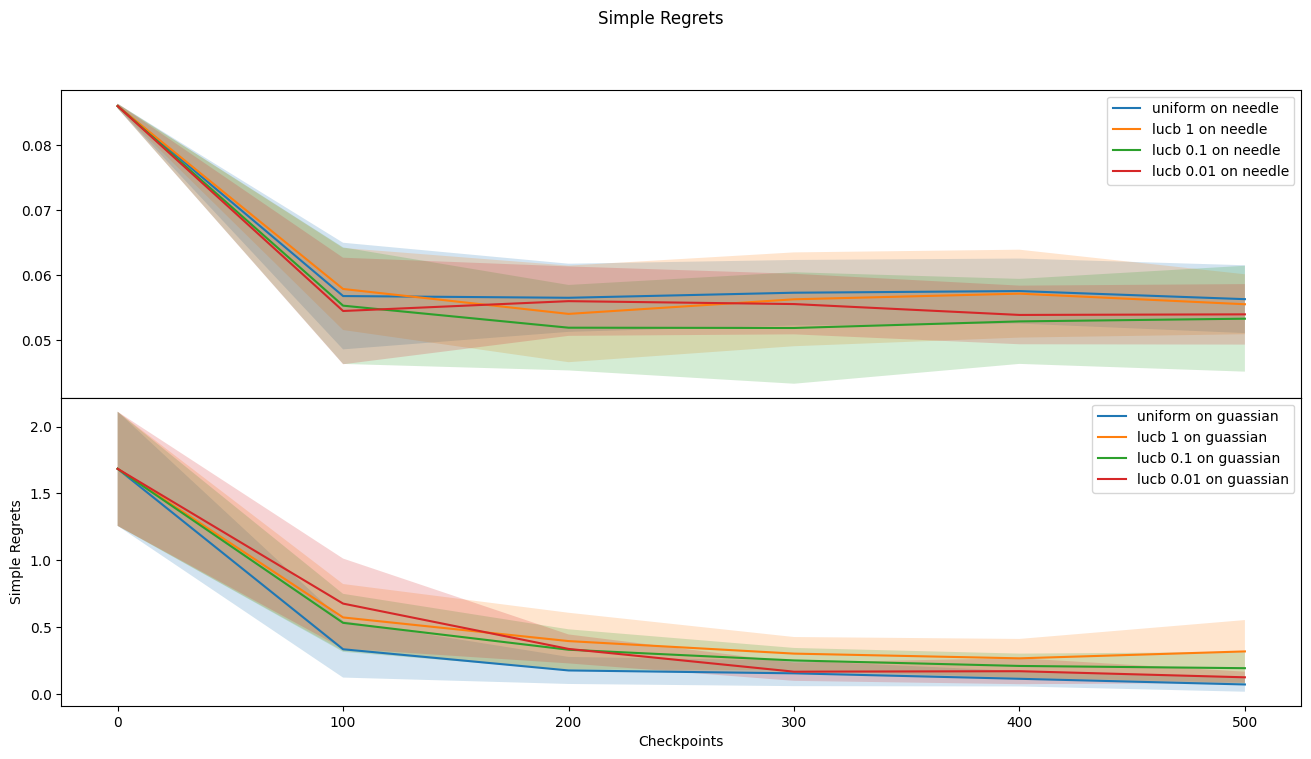

In [5]:
experiment.interact(n_steps=500, n_runs=10, log_progress=True)